## 1. Preparación del Entorno

In [1]:
# Instalación de las bibliotecas necesarias listadas en el archivo requirements.txt ubicado en el directorio padre.
#!pip install -r ../requirements.txt

In [2]:
# Importaciones de librerías de análisis de datos básicas.
import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.
import matplotlib.pyplot as plt  # Visualización de datos.
import seaborn as sns  # Visualización de datos basada en matplotlib.
from unidecode import unidecode  # Utilidad para eliminar diacríticos de strings.

# Importaciones de herramientas de Sklearn para modelado y evaluación.
from sklearn.preprocessing import OrdinalEncoder, StandardScaler  # Herramientas para la codificación y escalado de características.
from sklearn.tree import DecisionTreeRegressor  # Modelo de regresión basado en árboles de decisión.
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Modelos de ensamble basados en árboles.
from sklearn.impute import KNNImputer  # Imputador para completar datos faltantes usando el método de los k-vecinos más cercanos.
from sklearn.model_selection import train_test_split, GridSearchCV  # Herramientas para dividir datos y optimizar parámetros.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score  # Métricas de evaluación para modelos de regresión.
from sklearn.pipeline import Pipeline

In [3]:
# Configuración de Pandas para mejorar la visualización en cuadernos Jupyter.
pd.set_option('display.max_rows', None) # Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_columns', None) # Configurar Pandas para mostrar todas las columnas

In [4]:
# Añadir el directorio padre al path del sistema para permitir la importación de módulos personalizados.
import sys
sys.path.append('../src/utils')

# Importación de módulos personalizados para visualización y preprocesamiento de datos.
from utils import plot_heatmap, plot_count, plot_heatmap, plot_original_vs_imputed, plot_count_horizontal, plot_boxplot
from preprocess import * # Módulo personalizado que incluye funciones específicas de preprocesamiento.

## 2. Carga y Revisión Preliminar de Datos

**Cargamos los datos desde un archivo Excel y ajustamos el DataFrame** para trabajar con él de manera más eficiente. Este paso incluye establecer el encabezado adecuado y asegurar que los nombres de las columnas estén limpios y sin espacios adicionales.

In [5]:
# Carga de datos
df = cargar_datos('../data/raw/BBDD_gen.xlsx')
df = preparar_columnas(df)

Datos cargados con dimensiones iniciales: (898, 329)
Columnas renombradas para diferenciar entre marcha y carrera.


Establecemos la **primera fila como encabezado** para tener nombres de columnas más descriptivos y renombramos las columnas para **diferenciar** explícitamente entre datos relacionados con **la marcha y la carrera**, lo cual es crucial para análisis posteriores que puedan necesitar tratar estas características por separado.

In [6]:
df.head()

,Codigo,Sujeto,Fecha Nacimiento,Fecha de exploración,Edad,Sexo,Altura,Peso,Nº de calzado,Motivo de consulta,NºPatologia,Articulación,Localizacion,Lado,Patologia,Enf Sistemicas 1,Enfermedades Sistemicas 2,Sintomas narrados,Diagnóstico 1,Dagnóstico 2,IQ,Fecha IQ,Resultado IQ,Tabaco,Alcohol,Medicación,Fármacos,Alergias,Alergenos,Actividad principal,Marca 10K,Especialidad,km/sem,Calzado 1,Calzado 2,Pace_walk,Velocidad_walk,Step Rate_walk,Stride Length_walk,Contact Time_walk,Flight Ratio_walk,Power_walk,Shock_walk,Impact Gs_walk,Braking Gs_walk,Footstrike Type_walk,Pronation Excursion_walk,Max Pronation Velocity_walk,Peak Vertical GRF_walk,Contact Ratio_walk,Flight Time_walk,Stride Angle_walk,Leg Spring Stiffness_walk,Vertical Spring Stiffness_walk,Vertical GRF Rate_walk,Horizontal GRF Rate_walk,Swing Force Rate_walk,VO<sub>2</sub>_walk,Total Force Rate_walk,Time (Max Swing->FS)_walk,Time (FS->MPV)_walk,Time (MPV->MP)_walk,Time (MP->TO)_walk,Time (Min Swing->Max Swing)_walk,Time (TO->Min Swing)_walk,Medio Lateral Gs_walk,Braking Gs (Amplitude)_walk,Impact Gs (Amplitude)_walk,Vertical Speed_walk,Elevation Gain_walk,Yaw Excursion_walk,Swing Excursion_walk,Yaw Excursion (MP->TO)_walk,Yaw Excursion (Swing)_walk,Max Stance Velocity (FS->MP)_walk,Max Stance Velocity (MP->TO)_walk,Step Length_walk,Pronation Excursion (MP->TO)_walk,Stance Excursion (FS->MP)_walk,Stance Excursion (MP->TO)_walk,Min Tilt_walk,Max Tilt_walk,Min Obliquity_walk,Max Obliquity_walk,Min Rotation_walk,Max Rotation_walk,Max Tilt Rate_walk,Max Obliquity Rate_walk,Max Rotation Rate_walk,Vertical Oscillation_walk,Braking Gs2_walk,Impact Gs2_walk,Medio Lateral Gs2_walk,Pace_run,Velocidad_run,Step Rate_run,Stride Length_run,Contact Time_run,Flight Ratio_run,Power_run,Shock_run,Impact Gs_run,Braking Gs_run,Footstrike Type_run,Pronation Excursion_run,Max Pronation Velocity_run,Peak Vertical GRF_run,Contact Ratio_run,Flight Time_run,Stride Angle_run,Leg Spring Stiffness_run,Vertical Spring Stiffness_run,Vertical GRF Rate_run,Horizontal GRF Rate_run,Swing Force Rate_run,VO<sub>2</sub>_run,Total Force Rate_run,Time (Max Swing->FS)_run,Time (FS->MPV)_run,Time (MPV->MP)_run,Time (MP->TO)_run,Time (Min Swing->Max Swing)_run,Time (TO->Min Swing)_run,Medio Lateral Gs_run,Braking Gs (Amplitude)_run,Impact Gs (Amplitude)_run,Vertical Speed_run,Elevation Gain_run,Yaw Excursion_run,Swing Excursion_run,Yaw Excursion (MP->TO)_run,Yaw Excursion (Swing)_run,Max Stance Velocity (FS->MP)_run,Max Stance Velocity (MP->TO)_run,Step Length_run,Pronation Excursion (MP->TO)_run,Stance Excursion (FS->MP)_run,Stance Excursion (MP->TO)_run,Min Tilt_run,Max Tilt_run,Min Obliquity_run,Max Obliquity_run,Min Rotation_run,Max Rotation_run,Max Tilt Rate_run,Max Obliquity Rate_run,Max Rotation Rate_run,Vertical Oscillation_run,Braking Gs2_run,Impact Gs2_run,Medio Lateral Gs2_run,M1 Hipermovil,TF Normal,TT Normal,AP Adducto,Thomas Psoas,Thomas RF,Thomas TFL,Ober,AP_Varo,AP_Neutro,AP_Valgo,RP_Varo,RP_Neutro,RP_Valgo,Arco normal,Arco Aplanado,Arco elevado,PIe cavo posterior,PIe cavo anterior,M1 DFx,M5 Hipermovil,M5 Dfx,Arco transverso disminuido,M1 PFx,Cavo Col medial,M5 PFx,Cavo col Lateral,Arco transverso aumentado,MTF1 Normal,HLF,HL,HR,HAV,Index Minus,Index plus-minus,Index Plus,Col lat corta,Col lat larga,Pie griego,Pie cuadrado,Pie egipcio,TFI,TFE,TTI,TTE,AP Normal ABD-AD,AP Abducto,Pierna Corta,Rot Ext Cadera Izquierda,Rot Ext Cadera Derecha,Rot Int Cadera Derecha,Rot Int Cadera Izquierda,Dismetría,Ober Friccion,Popliteo,POPLITEO CL Neutra,PNCA AP Varo,PNCA AP Neutro,PNCA AP Valgo,PNCA RP Varo,PNCA RP Neutro,PNCA RP Valgo,T_Hintermann,Jack Normal,Jack R aumentada,Jack No reconstruye,Jack R disminuida,Pron max Normal,Pronación no disponible,2Heel Raise,Heel Raise,FPI_1_I,FPI_1_D,FPI_2_I,FPI_2_D,FPI_3_I,FPI_3_D,FPI_4_I,FPI_4_D,FPI_5_I,FPI_5_D,FPI_6_I,FPI_6_D,FPI_Total_I,FPI_Total_D,Tibia vara proximal,Tibia Vara distal,Rotula divergente,Rotula descendida,Rotula convergente,Rotula ascencida,Valgo-Varo_I,Gen

## 3. Depuración de Variables Irrelevantes

Realizamos varias rondas de **eliminación de columnas** basándonos en la relevancia para el análisis. Este enfoque progresivo permite **revisar el impacto de la eliminación** de columnas en la estructura del conjunto de datos. Tras cada paso importante, mostramos las dimensiones del DataFrame y sus primeras filas para **verificar los cambios realizados**.

In [7]:
# Lista de columnas a eliminar en varias rondas
columnas_a_eliminar_ronda1 = ['Codigo','Sujeto', 'Fecha Nacimiento', 'Fecha de exploración', 'Motivo de consulta',
           'NºPatologia', 'Patologia', 'Enf Sistemicas 1', 'Enfermedades Sistemicas 2', 'Sintomas narrados',
           'Diagnóstico 1', 'Dagnóstico 2', 'IQ', 'Fecha IQ', 'Resultado IQ',
           'Tabaco', 'Alcohol', 'Medicación', 'Fármacos', 'Alergias', 'Alergenos',
           
           'Min Tilt_walk', 'Max Tilt_walk', 'Min Obliquity_walk', 'Max Obliquity_walk',
           'Min Rotation_walk', 'Max Rotation_walk', 'Max Tilt Rate_walk', 'Max Obliquity Rate_walk',
           'Max Rotation Rate_walk', 'Medio Lateral Gs2_walk', 'Elevation Gain_walk',
           'Time (Max Swing->FS)_walk', 'Time (FS->MPV)_walk', 'Time (MPV->MP)_walk', 'Time (MP->TO)_walk',
           'Time (Min Swing->Max Swing)_walk', 'Time (TO->Min Swing)_walk', 'Medio Lateral Gs_walk',
           'Braking Gs (Amplitude)_walk', 'Impact Gs (Amplitude)_walk', 'Vertical Speed_walk',
           'Yaw Excursion_walk', 'Swing Excursion_walk', 'Yaw Excursion (MP->TO)_walk', 'Yaw Excursion (Swing)_walk',
           'Max Stance Velocity (FS->MP)_walk', 'Max Stance Velocity (MP->TO)_walk',
           'Braking Gs2_walk', 'Impact Gs2_walk',
           
           'Min Tilt_run', 'Max Tilt_run', 'Min Obliquity_run', 'Max Obliquity_run',
           'Min Rotation_run', 'Max Rotation_run', 'Max Tilt Rate_run', 'Max Obliquity Rate_run',
           'Max Rotation Rate_run', 'Medio Lateral Gs2_run', 'Elevation Gain_run',
           'Time (Max Swing->FS)_run', 'Time (FS->MPV)_run', 'Time (MPV->MP)_run', 'Time (MP->TO)_run',
           'Time (Min Swing->Max Swing)_run', 'Time (TO->Min Swing)_run', 'Medio Lateral Gs_run',
           'Braking Gs (Amplitude)_run', 'Impact Gs (Amplitude)_run', 'Vertical Speed_run',
           'Yaw Excursion_run', 'Swing Excursion_run', 'Yaw Excursion (MP->TO)_run', 'Yaw Excursion (Swing)_run',
           'Max Stance Velocity (FS->MP)_run', 'Max Stance Velocity (MP->TO)_run',
           'Braking Gs2_run', 'Impact Gs2_run',
           
           'Rot Ext Cadera Izquierda', 'Rot Ext Cadera Derecha', 'Rot Int Cadera Derecha',
           'Rot Int Cadera Izquierda', 'Dismetría', 'POPLITEO CL Neutra', 'Valgo-Varo_I',
           'Pelvis AV', 'Rot_Pelvis_Izda', 'EIAS_Down_Izda', 'Hiperlordosis cervical',
           'Hipercifosis torácica', 'Hiperlordosis lumbar', 'Antepulsión torax',
           'Antepulsión pelvis', 'Retropulsion Pelvis', 'Rectificación lumbar',
           'Retropulsion Torax', 'Dorso plano', 'Rectificación Cervical', 'GAZE Elevada',
           'GAZE Disminuida', 'Retrognatismo', 'Prognatismo', 'Inclinación izquierda cabeza',
           'Escoliosis Cervical Izquierda', 'Escoliosis Cervical Derecha', 'Escoliosis Dorsal Derecha',
           'Escoliosis Dorsal Izquierda', 'Escoliosis Lumbar Izquierda', 'Escoliosis Lumbar Derecha',
           'Escoliosis Rotación toracica derecha', 'Escoliosis Rotación toracica izquierda',
           'Rotación izquierda cabeza', 'Rotación derecha cabeza', 'Rotación derecha torax',
           'Rotación izquierda torax', 'Antepulsion Cabeza', 'Inclinación derecha cabeza',
           'Lateropulsión cabeza derecha', 'Lateropulsión cabeza izquierda', 'Lateropulsión torax izquierda',
           'Lateropulsión pelvis  derecha', 'Lateropulsión pelvis  izquierda', 'EIPS_Down_Izda', 'EIPS_Down_Dcha',
           'EIAS_Down_Dcha', 'Lateropulsión torax derecha', 'Descenso hombro izquierdo',
           'Elevación Hombro Izquierdo', 'Elevación hombro derecho', 'Descenso hombro derecho',
           'Retropulsión Cabeza', 'Impresión Diagnóstica de función', 'Pruebas complementarias',
           'Escaneo 25%', 'Escaneo 50%', 'Escaneo 75%', 'Escaneo 100%', 'TPU', 'TPU Run', 'PA12 Anterocapital',
           'PA12 Retro', 'Pelvis Rot Dcha', 'Videoconferencia con informe', 'Telemetría', 'Solo informe',
           'entrega y revisiones', 'Iliaco Izquierdo AV', 'Iliaco Izquierdo RV', 'Iliaco Dcho AV',
           'Iliaco Dcho RV', 'EIAS_Up_Izda', 'EIAS_Up_Dcha', 'EIPS_Up_I', 'EIPS_Up_Dcha', 'Calzado',
           'Escaneo 0%', 'Elementos en taller', 'Fisioterapia y ejercicios', 'Llamar cuando lleguen plantillas',
           'Elementos en Diseño', 'Iliaco Izquierdo Normal', 'Iliaco Dcho Normal', 'Lunge Izq', 'Lunge Dcho']

columnas_a_eliminar_ronda2 = ['TF Normal', 'TT Normal', 'Arco normal', 'AP_Neutro',  'RP_Neutro',
           'Cavo Col medial', 'Cavo col Lateral', 'MTF1 Normal', 'Col lat corta', 'Col lat larga', 
           'Genu normal', 'Pierna Corta', 'AP Normal ABD-AD', 'Genu neutro',
           'PNCA AP Neutro', 'PNCA RP Neutro', 'Jack R aumentada', 'Jack R disminuida',
           'Pron max Normal', 'Rotula descendida','Index plus-minus', 'Index Plus']

columnas_a_eliminar_ronda3 = ['AP_Varo', 'AP_Valgo', 'RP_Varo', 'RP_Valgo', 'M5 Dfx', 'M5 PFx', 'AP Adducto', 'AP Abducto',
           'PIe cavo posterior', 'PIe cavo anterior', 'Pie griego', 'Pie cuadrado', 'Pie egipcio',
           'FPI_1_I', 'FPI_1_D', 'FPI_2_I', 'FPI_2_D', 'FPI_3_I', 'FPI_3_D', 
           'FPI_4_I', 'FPI_4_D', 'FPI_5_I', 'FPI_5_D', 'FPI_6_I', 'FPI_6_D']

columnas_a_eliminar_ronda4 = ['Flight Time_walk', 'Contact Time_walk', 'Horizontal GRF Rate_walk', 'Swing Force Rate_walk',
           'VO<sub>2</sub>_walk', 'Flight Time_run', 'Contact Time_run', 'Horizontal GRF Rate_run',
           'Swing Force Rate_run', 'VO<sub>2</sub>_run', 'Vertical Oscillation_walk']

df = eliminar_columnas_irrelevantes(df, columnas_a_eliminar_ronda1)
df = eliminar_columnas_irrelevantes(df, columnas_a_eliminar_ronda2)
df = eliminar_columnas_irrelevantes(df, columnas_a_eliminar_ronda3)
df = eliminar_columnas_irrelevantes(df, columnas_a_eliminar_ronda4)

# Mostrar total de NaN para considerar la siguiente fase de imputación
print("Total NaN:", df.isna().sum().sum())

Datos después de eliminar columnas: (897, 164)
Datos después de eliminar columnas: (897, 142)
Datos después de eliminar columnas: (897, 117)
Datos después de eliminar columnas: (897, 106)
Total NaN: 22128


## 4. Estandarización y Limpieza de Datos

Se enfatiza la importancia de tener nombres de columnas limpios y se implementan funciones de limpieza específicas para algunas columnas clave, ajustándolas para corregir errores específicos y valores atípicos.

In [8]:
# Normalización de Nombres de Columnas
df.columns = [unidecode(col).lower() for col in df.columns]

# Corregir errores específicos en los nombres de las columnas
corrections = {
    'rotula ascencida': 'rotula ascendida',
    'no de calzado': 'num calzado'
}
df.columns = [corrections.get(col, col) for col in df.columns]
print("Correcciones aplicadas a los nombres de las columnas.")

# Aplicar la limpieza general a todas las columnas de tipo objeto
for col in df.select_dtypes(include=['object']).columns:
    df[col] = clean_column(df[col])
print("Limpieza general de contenidos de columnas completada.")

# Aplicar funciones de limpieza específicas a columnas designadas
df['articulacion'] = clean_articulacion(df['articulacion'])
df['localizacion'] = clean_localizacion(df['localizacion'])
df['lado'] = clean_lado(df['lado'])
print("Limpieza específica de columnas completada.")

df.head() # Mostrar las primeras filas del DataFrame para verificar los cambios finales

Correcciones aplicadas a los nombres de las columnas.
Limpieza general de contenidos de columnas completada.
Limpieza específica de columnas completada.


,edad,sexo,altura,peso,num calzado,articulacion,localizacion,lado,actividad principal,marca 10k,especialidad,km/sem,calzado 1,calzado 2,pace_walk,velocidad_walk,step rate_walk,stride length_walk,flight ratio_walk,power_walk,shock_walk,impact gs_walk,braking gs_walk,footstrike type_walk,pronation excursion_walk,max pronation velocity_walk,peak vertical grf_walk,contact ratio_walk,stride angle_walk,leg spring stiffness_walk,vertical spring stiffness_walk,vertical grf rate_walk,total force rate_walk,step length_walk,pronation excursion (mp->to)_walk,stance excursion (fs->mp)_walk,stance excursion (mp->to)_walk,pace_run,velocidad_run,step rate_run,stride length_run,flight ratio_run,power_run,shock_run,impact gs_run,braking gs_run,footstrike type_run,pronation excursion_run,max pronation velocity_run,peak vertical grf_run,contact ratio_run,stride angle_run,leg spring stiffness_run,vertical spring stiffness_run,vertical grf rate_run,total force rate_run,step length_run,pronation excursion (mp->to)_run,stance excursion (fs->mp)_run,stance excursion (mp->to)_run,vertical oscillation_run,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,pnca ap varo,pnca ap valgo,pnca rp varo,pnca rp valgo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge
0,36,f,173,65,40,rodilla,medial,b,NaN,NaN,NaN,NaN,NaN,NaN,1.2916,5,108.456898,1.4267,0,95.981481,3.566339,2.310324,2.610172,6.314815,-11.106498,177.510574,1.139044,127.44998,9.059576,0.453526,0,13.915741,24.95212,0.7133,-14.72513,19.445907,62.315404,2.748551,10,161.715795,2.039509,6.593809,176.417722,11.974009,10.824272,5.054195,7.822785,-13.776322,477.409271,2.289862,93.300849,0.186361,7.51902,21.803643,28.354237,88.931286,1.019748,-11.32853,15.311133,64.305786,9.463862,No,Negativo,Negativo,Negativo,Negativo,No,Bilateral,No,No,No,No,No,No,No,No,Bilateral,Bilateral,No,Bilateral,No,Bilateral,Negativo,Negativo,No,No,No,No,Izquierda,Bilateral,No,No,No,No,-1,-1,No,No,No,No,No,No,No,Bilateral,No,Derecho
1,35,m,181,78,44,sin afectación,no especificado,ninguno,"Run, ciclismo",45,NaN,NaN,Nike kiger,NaN,1.370079,5,114.767847,1.4312,0,136.534483,3.119538,1.900867,2.387259,6.948276,-8.176466,109.542317,1.222143,124.224798,6.403624,48.715603,0,15.115353,30.589598,0.7156,0.962024,17.340533,55.030184,3.588932,13,172.110955,2.502031,30.331614,283.164706,15.401995,14.331714,5.501979,10.082353,-12.668764,686.949965,3.752896,69.573162,2.512311,11.643407,23.714214,40.468636,109.528792,1.251029,0.245774,9.668947,71.08696,7.520066,Bilateral,Negativo,Bilateral,Bilateral,Negativo,No,No,No,No,No,Bilateral,Derecha,No,Bilateral,No,No,Bilateral,No,No,No,No,Negativo,Negativo,No,No,No,No,No,No,No,No,No,No,7,7,No,No,No,No,No,Bilateral,No,No,No,Bilateral
2,45,m,189,88,46,sin afectación,no especificado,ninguno,NaN,NaN,NaN,NaN,NaN,NaN,1.371909,5,100.149777,1.6437,0,100.787234,2.368494,1.597828,1.558757,10.680851,-4.411249,144.662411,1.091726,129.442638,10.637696,7.981094,0,12.657472,32.726926,0.8218,0.192496,8.006323,77.799223,3.237176,12,161.586499,2.412864,15.662497,295.075,12.238623,11.182911,4.905526,8.6625,-5.597087,370.364379,2.753032,84.248189,0.808101,7.467717,19.412686,31.394826,98.867903,1.206434,4.629309,13.068565,64.478919,9.743993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43,m,182,70,44,pie,medial,d,NaN,NaN,NaN,NaN,Saucony,NaN,1.318286,5,103.976334,1.5381,0,101.42,2.667928,1.708754,1.985392,11.18,-4.351264,123.764646,1.149516,127.091716,8.991884,598.235028,0,13.385676,28.22087,0.769,6.506884,7.471882,8

### Eliminación de Registros Irrelevantes o Outliers

In [9]:
df = filter_age(df)

Valores faltantes en 'edad' antes de filtrar: 17
Nº original de registros: 897 
Nº de registros después de eliminar menores de 14 años: 842
Edad mínima en el DataFrame filtrado: 15
Valores faltantes en la columna 'edad' después del filtro: 17
Total NaN en el DataFrame después del filtro: 20105


In [10]:
# Filtrar registros donde 'velocidad_walk' está entre 4.0 y 5.5
filtered_df = df[(df['velocidad_walk'] >= 4.0) & (df['velocidad_walk'] <= 5.5)]

count_in_range = filtered_df.shape[0]  # Contar registros dentro del rango
count_out_of_range = df.shape[0] - count_in_range  # Contar registros fuera del rango

print("Número de registros dentro del rango [4.0, 5.5]:", count_in_range)
print("Número de registros fuera del rango [4.0, 5.5]:", count_out_of_range)

Número de registros dentro del rango [4.0, 5.5]: 718
Número de registros fuera del rango [4.0, 5.5]: 124


In [11]:
df[(df['velocidad_walk'] < 4.0) | (df['velocidad_walk'] > 5.5)]['velocidad_walk']

91     8
171    2
172    2
288    6
290    8
Name: velocidad_walk, dtype: object

In [12]:
df = df[(df['velocidad_walk'] >= 4.0) & (df['velocidad_walk'] <= 5.5)]
df = df[(df['articulacion'] != 'complejo')]
df.shape

(717, 106)

In [13]:
print("Total NaN:", df.isna().sum().sum())

Total NaN: 13049


## 5. Imputación de Valores Faltantes

### Preparación de Datos para Modelado

Primero convertir `Sexo` a valores binarios:

In [14]:
df['sexo'] = df['sexo'].replace({'f': 0, 'm': 1})
print(df['sexo'].value_counts()) # Verificar la transformación

sexo
1    478
0    239
Name: count, dtype: int64


In [15]:
# Eliminar registros donde 'edad' es NaN para garantizar que el modelo se entrene con datos completos
df_full = df.dropna(subset=['edad'])
X = df_full[['sexo', 'altura', 'peso', 'num calzado']]
y = df_full['edad']
print(f"Valores faltantes en 'edad' después de eliminar registros sin 'edad': {y.isna().sum()}") # Verificación

# Dividir datos en conjuntos de entrenamiento y prueba, estratificando por 'sexo' para mantener proporciones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_full['sexo'])

Valores faltantes en 'edad' después de eliminar registros sin 'edad': 0


In [16]:
print("Total NaN:", df.isna().sum().sum())

Total NaN: 13049


### Configuración y Entrenamiento de Modelos

Configurar y entrenar un modelo de regresión forestal aleatoria para predecir la 'edad' basada en otros factores demográficos y físicos.

In [17]:
# Configurar hiperparámetros para RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train) # Realizar búsqueda de cuadrícula con validación cruzada

# Mostrar los mejores parámetros y modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor modelo: {best_model}")

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Mejor modelo: RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)


In [18]:
best_model.fit(X_train, y_train) # Entrenar el modelo

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

### Evaluación de Modelos

Evaluación del modelo entrenado para verificar su precisión y rendimiento.

In [19]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo utilizando métricas estándar
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
print(f"MAE: {mae.round(3)}, MSE: {mse.round(3)}, RMSE: {rmse.round(3)}, R^2: {r2.round(3)}, \nMedAE: {medae.round(3)}, Explained Variance Score: {explained_variance.round(3)}")

MAE: 8.753, MSE: 130.63, RMSE: 11.429, R^2: 0.311, 
MedAE: 7.143, Explained Variance Score: 0.315


Los resultados del modelo **RandomForestRegressor** muestran un **Mean Absolute Error (MAE) de 8.542** y un **Median Absolute Error (MedAE) de 6.16**, indicando que en promedio, las predicciones del modelo se desvían aproximadamente **8.5 años del valor real**, con una mediana del error absoluto más centrada en 6.16 años.

Aunque el **MAE y MedAE** proporcionan una perspectiva útil sobre errores típicos que no son excesivamente influenciados por valores atípicos, las métricas como el **Mean Squared Error (MSE) y el Root Mean Squared Error (RMSE)**, que son significativamente altos en este caso, sugieren que hay errores puntuales más grandes afectando las predicciones.

El **coeficiente \( R^2 \) de 0.346** y un **Explained Variance Score de 0.349** reflejan que el modelo **no ha capturado completamente la variabilidad de los datos** y podría beneficiarse de una revisión en su configuración o en la selección de características para mejorar la precisión y la explicación de la varianza en las edades predichas.

In [20]:
# Comparar edades reales con predichas para una muestra
X_sample = X_train.head(10) 
y_real = y_train.head(10) 
y_pred_sample = best_model.predict(X_sample) 
df_comparison = pd.DataFrame({'Edad Real': y_real, 'Edad Predicha': y_pred_sample})
print(df_comparison)

    Edad Real  Edad Predicha
551        28      30.305000
615        28      31.373852
381        36      37.080000
122        50      49.170000
735        19      20.513333
26         36      32.736667
821        42      41.015000
738        45      43.229000
14         43      42.033333
750        39      46.463333


A pesar de los **valores relativamente altos en MSE y RMSE**, **las predicciones individuales del modelo no parecen estar demasiado alejadas de los valores reales**, como se observa en la comparación directa entre las edades reales y las predichas. Los errores en estas predicciones individuales son moderados, y en muchos casos, la diferencia entre la edad real y la predicha es de unos pocos años. Este patrón sugiere que mientras el modelo podría estar lidiando con algunos **valores atípicos o ciertas características de los datos que están influyendo desproporcionadamente en el MSE, para propósitos prácticos y en términos generales, el modelo proporciona estimaciones razonables.**

La discrepancia entre un \( R^2 \) moderadamente bajo y un MAE/MedAE relativamente bajo podría indicar que aunque el modelo no explica una gran parte de la varianza total (posiblemente debido a la variabilidad intrínseca alta en los datos o a la presencia de valores atípicos), **es capaz de hacer predicciones útiles y cercanas a los valores reales en muchos casos**. Esto resalta la importancia de interpretar las métricas de evaluación en conjunto y en el contexto del problema específico y los datos con los que se está trabajando.

### Imputación de datos faltantes en `Edad` utilizando el modelo entrenado

Se imputan las edades faltantes utilizando el modelo entrenado y se reintegran al DataFrame original, con una verificación final de los cambios en la distribución de 'Edad'.

In [21]:
df['edad'] = pd.to_numeric(df['edad'], errors='coerce').astype('Int64')
df_missing = df[df['edad'].isnull()][['sexo', 'altura', 'peso', 'num calzado']]
predicted_ages = best_model.predict(df_missing)
df_missing['edad'] = predicted_ages.astype(int)
df.update(df_missing)
print(f"Valores faltantes en 'edad': {df['edad'].isna().sum()}")
print("Imputación completada. Total NaN:", df.isna().sum().sum())

Valores faltantes en 'edad': 0
Imputación completada. Total NaN: 13036


### Imputación de Valores Faltantes en las Columnas de Exploración Clínica

Primero se definen las listas de las columnas categóricas que se desean imputar y después se realiza la imputación. Los siguientes scripts seleccionan la moda de cada columna y reemplazan los valores faltantes con esa moda. Si una columna no tiene una moda (por ejemplo, si todos los valores presentes son únicos), el código asignará el valor 'No' o 'Negativo'.

In [22]:
# Definir las columnas y valores predeterminados
columns_to_impute = [
    'tfi', 'tfe', 'tti', 'tte', 'arco aplanado', 'arco elevado', 'm1 dfx', 'm1 pfx', 'm5 hipermovil', 
    'arco transverso disminuido', 'arco transverso aumentado', 'm1 hipermovil', 'hlf', 'hl', 'hr', 'hav', 
    'index minus', 'tibia vara proximal', 'tibia vara distal', 'rotula divergente', 'rotula convergente', 
    'rotula ascendida', 'genu valgo', 'genu varo', 'genu recurvatum', 'genu flexum', 'pnca ap varo', 
    'pnca ap valgo', 'pnca rp varo', 'pnca rp valgo', 't_hintermann', 'jack normal', 'jack no reconstruye', 
    'pronacion no disponible', '2heel raise', 'heel raise', 'thomas psoas', 'thomas rf', 'thomas tfl', 
    'ober', 'lunge', 'ober friccion', 'popliteo'
]

default_values = {
    'Negativo': ['thomas psoas', 'thomas rf', 'thomas tfl', 'ober', 'lunge', 'ober friccion', 'popliteo'],
    'No': [col for col in columns_to_impute if col not in ['thomas psoas', 'thomas rf', 'thomas tfl', 'ober', 'lunge', 'ober friccion', 'popliteo']]
}

df = impute_clinical_data(df, default_values)
df[df.columns[61:]].head()

Imputación completada. Total NaN: 12563


,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,pnca ap varo,pnca ap valgo,pnca rp varo,pnca rp valgo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge
0,No,Negativo,Negativo,Negativo,Negativo,No,Bilateral,No,No,No,No,No,No,No,No,Bilateral,Bilateral,No,Bilateral,No,Bilateral,Negativo,Negativo,No,No,No,No,Izquierda,Bilateral,No,No,No,No,-1,-1,No,No,No,No,No,No,No,Bilateral,No,Derecho
1,Bilateral,Negativo,Bilateral,Bilateral,Negativo,No,No,No,No,No,Bilateral,Derecha,No,Bilateral,No,No,Bilateral,No,No,No,No,Negativo,Negativo,No,No,No,No,No,No,No,No,No,No,7,7,No,No,No,No,No,Bilateral,No,No,No,Bilateral
2,No,Negativo,Negativo,Negativo,Negativo,No,No,No,No,No,No,No,No,No,No,No,Bilateral,No,No,No,No,Negativo,Negativo,No,No,No,No,No,Bilateral,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,No,No,Negativo
3,Bilateral,Negativo,Bilateral,Negativo,Negativo,No,No,Bilateral,No,No,No,No,No,No,No,No,Bilateral,No,No,No,Bilateral,Negativo,Negativo,No,No,No,Bilateral,No,Bilateral,No,No,No,No,7,7,No,No,No,No,No,No,No,Bilateral,No,Negativo
4,No,Negativo,Bilateral,Derecho,Negativo,No,Bilateral,No,No,No,Bilateral,Bilateral,No,No,No,No,Bilateral,No,No,No,Bilateral,Negativo,Bilateral,No,No,No,No,No,No,No,No,No,No,3,0,Derecha,No,No,No,No,No,Bilateral,No,No,Bilateral


In [23]:
df.dtypes

edad                                  Int64
sexo                                  int64
altura                               object
peso                                 object
num calzado                          object
articulacion                         object
localizacion                         object
lado                                 object
actividad principal                  object
marca 10k                            object
especialidad                         object
km/sem                               object
calzado 1                            object
calzado 2                            object
pace_walk                            object
velocidad_walk                       object
step rate_walk                       object
stride length_walk                   object
flight ratio_walk                    object
power_walk                           object
shock_walk                           object
impact gs_walk                       object
braking gs_walk                 

## 6. Creación de Variables Derivadas

### IMC

In [24]:
# Lista de columnas para convertir a numérico
columns_to_convert = ['altura', 'peso', 'num calzado']

print("Nº de columnas numéricas antes de la codificación:", df.select_dtypes(include=['number']).columns.size)

# Convertir las columnas seleccionadas a numérico, ignorando los errores y transformando los no numéricos en NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
print("Número de columnas numéricas después de la codificación:", df.select_dtypes(include=['number']).columns.size)

Nº de columnas numéricas antes de la codificación: 2
Número de columnas numéricas después de la codificación: 5


In [25]:
# Calculamos el IMC y lo añadimos como una nueva columna al final
imc = (df['peso'] / (df['altura'] / 100) ** 2).round(2)
df = pd.concat([df, imc.rename('imc')], axis=1)
print("Estadísticas descriptivas de la columna 'imc':")
print(df['imc'].describe())
print("Nº de valores nulos en la columna 'imc':", df['imc'].isna().sum())

Estadísticas descriptivas de la columna 'imc':
count    717.000000
mean      23.677434
std        3.421989
min       15.040000
25%       21.300000
50%       23.390000
75%       25.450000
max       41.670000
Name: imc, dtype: float64
Nº de valores nulos en la columna 'imc': 0


### Zona Afectada

In [26]:
df = replace_and_verify(df, 'lado', {
    'b + r': 'b', 'b + i': 'b', 'ninguno': 'no especificado',
})
df = create_affected_zone_column(df)

Valores únicos en 'lado': ['b' 'no especificado' 'd' 'i']
Nº de valores únicos en 'zona afectada': 96


In [27]:
# Imprimir valores únicos en 'zona afectada' antes del mapeo
print("Valores únicos antes del mapeo:", df['zona afectada'].unique())

Valores únicos antes del mapeo: ['rodilla_medial_b' 'sin afectacion_no especificado_no especificado'
 'pie_medial_d' 'pierna_posterior_b' 'tobillo_lateral_b'
 'espalda_lumbar_b' 'rodilla_lateral_i' 'rodilla_anteroposterior_d'
 'pierna_lateral_i' 'pie_plantar proximal_i' 'pie_plantar distal_i'
 'rodilla_anterior_b' 'tobillo_medial_d' 'tobillo_posterior_d'
 'rodilla_anterior_d' 'tobillo_posterior_b' 'pie_plantar proximal_b'
 'cadera_lateral_d' 'pie_lateral_i' 'rodilla_medial_i' 'cadera_lateral_i'
 'muslo_posterior_i' 'tobillo_medial_i' 'pie_plantar distal_d'
 'pierna_posterior_d' 'rodilla_anterior_i' 'pie_plantar proximal_d'
 'tobillo_anteroposterior_i' 'rodilla_lateral_d' 'muslo_lateral_d'
 'cadera_posterior_no especificado' 'rodilla_posterior_i'
 'tobillo_medial_b' 'tobillo_anteroposterior_d' 'tobillo_mediolateral_d'
 'rodilla_anterolateral_b' 'tobillo_mediolateral_b' 'muslo_posterior_d'
 'cadera_posterior_d' 'cadera_posterior_b' 'tobillo_anterior_d'
 'tobillo_posterior_i' 'rodilla_med

In [28]:
group_mapping = {
    'pie_plantar distal_i': 'pie_plantar distal_i',
    'pie_plantar distal_d': 'pie_plantar distal_d',
    'pie_plantar distal_b': 'pie_plantar distal_b',
    'pie_plantar proximal_i': 'pie_plantar proximal_i',
    'pie_plantar_i': 'pie_plantar proximal_i',
    'pie_plantar proximal_d': 'pie_plantar proximal_d',
    'pie_plantar_d': 'pie_plantar proximal_d',
    'pie_plantar proximal_b': 'pie_plantar proximal_b',
    'pie_plantar_b': 'pie_plantar proximal_b',
    'pie_medial_b': 'pie-tobillo_medial_b',
    'tobillo_medial_b': 'pie-tobillo_medial_b',
    'tobillo_anteromedial_i': 'pie-tobillo_medial_i',
    'pie_medial_i': 'pie-tobillo_medial_i',
    'tobillo_medial_i': 'pie-tobillo_medial_i',
    'pie_anteromedial_i': 'pie-tobillo_medial_i',
    'pie_medial_d': 'pie-tobillo_medial_d',
    'tobillo_medial_d': 'pie-tobillo_medial_d',
    'tobillo_lateral_d': 'pie-tobillo_lateral_d',
    'tobillo_anterolateral_d': 'pie-tobillo_lateral_d',
    'pie_lateral_d': 'pie-tobillo_lateral_d',
    'tobillo_mediolateral_d': 'pie-tobillo_lateral_d',
    'tobillo_lateral_i': 'pie-tobillo_lateral_i',
    'pie_lateral_i': 'pie-tobillo_lateral_i',
    'tobillo_anterolateral_i': 'pie-tobillo_lateral_i',
    'tobillo_lateral_b': 'pie-tobillo_lateral_b',
    'pie_lateral_b': 'pie-tobillo_lateral_b',
    'tobillo_mediolateral_b': 'pie-tobillo_lateral_b',
    'pie_mediolateral_b': 'pie-tobillo_lateral_b',
    'tobillo_anterior_d': 'pie-tobillo_anterior',
    'pie_dorsal proximal_d': 'pie-tobillo_anterior',
    'pie_no especificado_d': 'pie-tobillo_anterior',
    'pie_dorsal distal_d': 'pie-tobillo_anterior',
    'pie_dorsal distal_i': 'pie-tobillo_anterior',
    'tobillo_anterior_i': 'pie-tobillo_anterior',
    'pie_dorsal distal_b': 'pie-tobillo_anterior',
    'tobillo_anteroposterior_d': 'tobillo_posterior_d',
    'tobillo_posterior_d': 'tobillo_posterior_d',
    'tobillo_posterior_i': 'tobillo_posterior_i',
    'tobillo_anteroposterior_i': 'tobillo_posterior_i',
    'tobillo_posterior_b': 'tobillo_posterior_b',
    'rodilla_anterior_b': 'rodilla_anterior_b',
    'rodilla_anterolateral_b': 'rodilla_anterior_b',
    'rodilla_anterior_i': 'rodilla_anterior_i',
    'rodilla_anteromedial_i': 'rodilla_anterior_i',
    'rodilla_anterolateral_i': 'rodilla_anterior_i',
    'rodilla_anteroposterior_i': 'rodilla_anterior_i',
    'rodilla_anterior_d': 'rodilla_anterior_d',
    'rodilla_anteromedial_d': 'rodilla_anterior_d',
    'rodilla_anteroposterior_d': 'rodilla_anterior_d',
    'rodilla_anterolateral_d': 'rodilla_anterior_d',
    'rodilla_lateral_i': 'rodilla_lateral_i',
    'rodilla_lateral_d': 'rodilla_lateral_d',
    'rodilla_lateral_b': 'rodilla_lateral_b',
    'rodilla_mediolateral_b': 'rodilla_lateral_b',
    'rodilla_medial_i': 'rodilla_medial_i',
    'rodilla_medial_d': 'rodilla_medial_d',
    'rodilla_medial_b': 'rodilla_medial_b',
    'pierna_anterior_b': 'pierna_anteromedial',
    'pierna_anteromedial_b': 'pierna_anteromedial',
    'pierna_medial_b': 'pierna_anteromedial',
    'pierna_anterior_d': 'pierna_anteromedial',
    'pierna_medial_d': 'pierna_anteromedial',
    'pierna_anteroposterior_i': 'pierna_anteromedial',
    'pierna_medial_i': 'pierna_anteromedial',
    'pierna_anterior_i': 'pierna_anteromedial',
    'pierna_lateral_i': 'pierna_lateral',
    'pierna_anterolateral_i': 'pierna_lateral',
    'pierna_lateral_d': 'pie-tobillo_lateral_d',
    'pierna_posterior_b': 'pierna_posterior_b',
    'pierna_posteromedial_b': 'pierna_posterior_b',
    'rodilla_posterior_b': 'pierna_posterior_b',
    'rodilla_posteromedial_b': 'pierna_posterior_b',
    'pierna_posterior_d': 'pierna_posterior_d',
    'rodilla_posterior_d': 'pierna_posterior_d',
    'rodilla_posterolateral_d': 'pierna_posterior_d',
    'pierna_posterior_i': 'pierna_posterior_i',
    'rodilla_posterior_i': 'pierna_posterior_i',
    'rodilla_posterolateral_i': 'pierna_posterior_i',
    'cadera_lateral_d': 'cadera_lateral_d',
    'muslo_lateral_d': 'cadera_lateral_d',
    'cadera_lateral_i': 'cadera_lateral',
    'cadera_lateral_b': 'cadera_lateral',
    'cadera_anterolateral_b': 'cadera_lateral',
    'espalda_lumbar_b': 'lumbar_b',
    'espalda_posterior_b': 'lumbar_b',
    'cadera_posterior_b': 'lumbar_b',
    'cadera_posterior_no especificado': 'lumbar_b',
    'espalda_lumbar_i': 'lumbar_i',
    'cadera_posterior_i': 'lumbar_i',
    'espalda_lumbar_d': 'lumbar_d',
    'cadera_posterior_d': 'lumbar_d',
    'sin afectacion_no especificado_no especificado': 'sin patologia',
    'muslo_posterior_d': 'otro',
    'muslo_posterior_i': 'otro',
    'muslo_posterior_b': 'otro',
    'cadera_anterior_b': 'otro',
    'cadera_anterior_i': 'otro',
    'cadera_anterior_d': 'otro',
    'muslo_anteroposterior_i': 'otro',
    'muslo_anterior_d': 'otro',
    'muslo_no especificado_d': 'otro',
    'sin afectacion_no especificado_b': 'sin patologia',
    'complejo_no especificado_complejo': 'otro',
    'complejo_no especificado_b': 'otro',
    'complejo_no especificado_i': 'otro',
    'cadera_medial_i': 'otro'
}

# Verificar que todas las claves del diccionario están en los valores únicos de 'zona afectada'
unique_zones = set(df['zona afectada'].unique())
mapping_keys = set(group_mapping.keys())
if not mapping_keys <= unique_zones:
    print("Claves del diccionario que no están en 'zona afectada':", mapping_keys - unique_zones)

Claves del diccionario que no están en 'zona afectada': {'pierna_medial_d', 'rodilla_anterolateral_d', 'pierna_lateral_d', 'complejo_no especificado_i', 'rodilla_posterior_b', 'complejo_no especificado_b', 'rodilla_posterolateral_i', 'pie_no especificado_d', 'espalda_posterior_b', 'complejo_no especificado_complejo'}


In [29]:
df = map_affected_zones(df, group_mapping)

Todas las categorías han sido mapeadas correctamente.


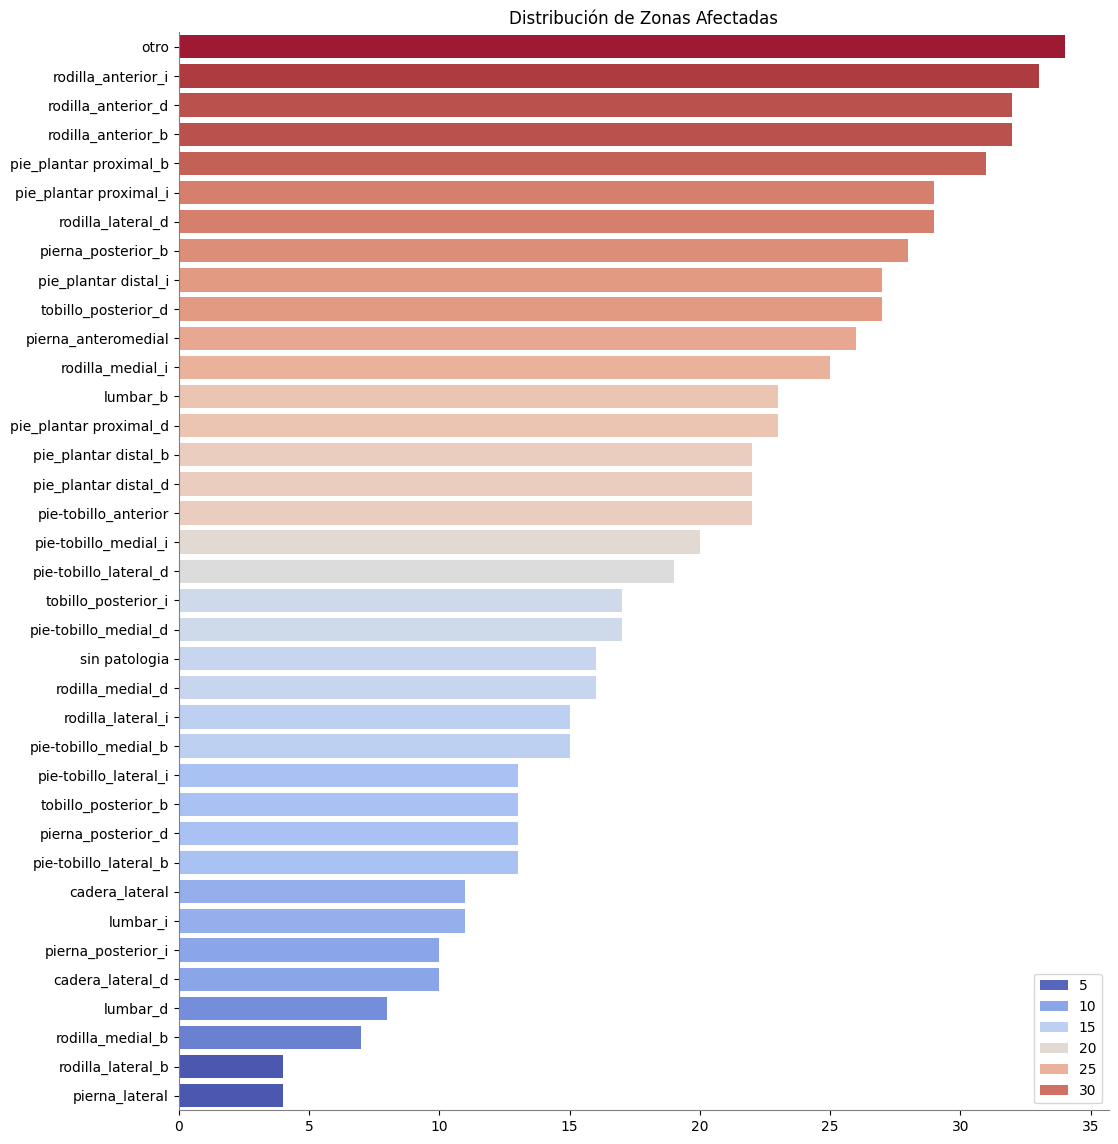

In [30]:
plot_count_horizontal(df, 'zona afectada', title="Distribución de Zonas Afectadas", xlabel="", ylabel="", figsize=(12, 14))

In [31]:
# df.dtypes        # Verificación
# df.isna().sum()  # Verificación

## 7. Codificación y Preparación de Variables para Modelado

### Codificar columnas de `Runscribe Marcha`

In [32]:
# Lista de columnas para convertir a numérico
columns_to_convert = ['pace_walk', 'velocidad_walk', 'step rate_walk', 'stride length_walk', 
                      'power_walk', 'shock_walk', 'impact gs_walk', 'braking gs_walk',
                      'footstrike type_walk', 'pronation excursion_walk', 'step length_walk',
                      'max pronation velocity_walk', 'peak vertical grf_walk',
                      'contact ratio_walk', 'stride angle_walk', 'leg spring stiffness_walk',
                      'vertical spring stiffness_walk', 'vertical grf rate_walk',
                      'total force rate_walk', 'pronation excursion (mp->to)_walk',
                      'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk',
                      'pace_run', 'velocidad_run', 'step rate_run', 'stride length_run',
                      'flight ratio_run', 'power_run', 'shock_run', 'impact gs_run',
                      'braking gs_run', 'footstrike type_run', 'pronation excursion_run',
                      'max pronation velocity_run', 'peak vertical grf_run', 'contact ratio_run',
                      'stride angle_run', 'leg spring stiffness_run', 'flight ratio_walk',
                      'vertical spring stiffness_run', 'vertical grf rate_run',
                      'total force rate_run', 'pronation excursion (mp->to)_run',
                      'stance excursion (fs->mp)_run', 'stance excursion (mp->to)_run',
                      'step length_run', 'fpi_total_i', 'fpi_total_d']

print("Nº de columnas numéricas antes de la codificación:", df.select_dtypes(include=['number']).columns.size)

# Convertir las columnas seleccionadas a numérico, ignorando los errores y transformando los no numéricos en NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
print("Número de columnas numéricas después de la codificación:", df.select_dtypes(include=['number']).columns.size)

Nº de columnas numéricas antes de la codificación: 6
Número de columnas numéricas después de la codificación: 54


In [33]:
# Modificamos los valores de la columna 'contact ratio_walk' a la mitad para mejorar la interpretación
df['contact ratio_walk'] = df['contact ratio_walk'] / 2

### Codificar columnas de `Test Clínicos`

In [34]:
# Lista de columnas de interés
columns_tests = [
    'm1 hipermovil', 'thomas psoas', 'thomas rf', 'thomas tfl', 'ober',
    'arco aplanado', 'arco elevado', 'm1 dfx', 'm5 hipermovil',
    'arco transverso disminuido', 'm1 pfx', 'arco transverso aumentado',
    'hlf', 'hl', 'hr', 'hav', 'index minus', 'tfi', 'tfe', 'tti', 'tte',
    'ober friccion', 'popliteo', 'pnca ap varo', 'pnca ap valgo',
    'pnca rp varo', 'pnca rp valgo', 't_hintermann', 'jack normal',
    'jack no reconstruye', 'pronacion no disponible', '2heel raise',
    'heel raise', 'tibia vara proximal', 'tibia vara distal', 'rotula divergente',
    'rotula convergente', 'rotula ascendida', 'genu valgo', 'genu varo',
    'genu recurvatum', 'genu flexum', 'lunge'
]

# Crear un string para cada columna con sus valores únicos
unique_values_summary = ""
for col in columns_tests:
    if col in df.columns:
        unique_values = ", ".join(map(str, df[col].dropna().unique()))
        unique_values_summary += f"{col}: {unique_values}\n"

print(unique_values_summary) # Imprimir el resumen de valores únicos

m1 hipermovil: No, Bilateral, Izquierda, Derecha
thomas psoas: Negativo, Bilateral, Izquierdo, Derecho
thomas rf: Negativo, Bilateral, Izquierdo, Derecho
thomas tfl: Negativo, Bilateral, Derecho, Izquierdo
ober: Negativo, Bilateral, Derecho
arco aplanado: No, Derecha, Bilateral, Izquierda
arco elevado: Bilateral, No, Derecha, Izquierda
m1 dfx: No, Bilateral, Derecha, Izquierda
m5 hipermovil: No, Bilateral, Izquierda, Derecha
arco transverso disminuido: No, Bilateral, Izquierda, Derecha
m1 pfx: No, Bilateral, Izquierda, Derecha
arco transverso aumentado: No, Derecha, Bilateral, Izquierda
hlf: No, Bilateral, Izquierda, Derecha
hl: No, Bilateral, Izquierda, Derecha
hr: No, Derecha, Bilateral, Izquierda
hav: Bilateral, No, Izquierda, Derecha
index minus: Bilateral, No, Derecha, Izquierda
tfi: No, Bilateral, Derecha, Izquierda
tfe: Bilateral, No, Izquierda, Derecha
tti: No, Bilateral, Derecha, Izquierda
tte: Bilateral, No, Derecha, Izquierda
ober friccion: Negativo, Derecho, Bilateral, Izqu

In [35]:
for col in columns_tests:
    df[col] = df.apply(codificar_tests, column=col, axis=1)

df[df.columns[62:]].head().T

,0,1,2,3,4
thomas psoas,0,0,0,0,0
thomas rf,0,0,0,3,3
thomas tfl,0,0,0,0,1
ober,0,0,0,0,0
arco aplanado,0,0,0,0,0
arco elevado,3,0,0,0,3
m1 dfx,0,0,0,3,0
m5 hipermovil,0,0,0,0,0
arco transverso disminuido,0,0,0,0,0
m1 pfx,0,0,0,0,3


In [36]:
# df.isna().sum()  # Verificación
# df.head()        # Verificación

## 8. Guardar el DataFrames en Archivo CSV incluyendo Datos de Carrera

In [37]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('../data/processed/dataset_corredores.csv', sep=";", index=False, encoding='utf-8')

In [38]:
columns = ['actividad principal', 'marca 10k', 'especialidad', 'km/sem', 'calzado 1', 'calzado 2',
          'pace_run', 'velocidad_run', 'step rate_run', 'stride length_run', 'contact ratio_run',
           'power_run', 'shock_run', 'impact gs_run', 'braking gs_run', 'footstrike type_run',
           'pronation excursion_run', 'max pronation velocity_run', 'peak vertical grf_run',
           'stride angle_run', 'leg spring stiffness_run', 'flight ratio_run', 'step length_run',
           'vertical spring stiffness_run', 'vertical grf rate_run', 'total force rate_run',
           'pronation excursion (mp->to)_run', 'stance excursion (fs->mp)_run',
           'stance excursion (mp->to)_run', 'vertical oscillation_run']

df.drop(columns, axis=1, inplace=True)
df.shape

(717, 78)

In [39]:
#df.dtypes # Solo las columnas 'articulacion', 'localizacion', 'lado' y 'zona afectada' son de tipo object

## 9. Continuar la Imputación de Valores Faltantes con menos registros

### Columnas relacionadas con `FPI` (Foot Posture Index)

In [40]:
df[['fpi_total_i','fpi_total_d']].describe()

,fpi_total_i,fpi_total_d
count,706.000000,706.000000
mean,3.296034,3.171388
std,4.257514,4.347048
min,-11.000000,-11.000000
25%,0.000000,0.000000
50%,3.000000,3.000000
75%,6.000000,6.000000
max,12.000000,12.000000


In [41]:
# Filtrar el DataFrame para encontrar registros con valores faltantes en ambas columnas
missing_fpi = df[df['fpi_total_i'].isna() & df['fpi_total_d'].isna()]
missing_fpi

,edad,sexo,altura,peso,num calzado,articulacion,localizacion,lado,pace_walk,velocidad_walk,step rate_walk,stride length_walk,flight ratio_walk,power_walk,shock_walk,impact gs_walk,braking gs_walk,footstrike type_walk,pronation excursion_walk,max pronation velocity_walk,peak vertical grf_walk,contact ratio_walk,stride angle_walk,leg spring stiffness_walk,vertical spring stiffness_walk,vertical grf rate_walk,total force rate_walk,step length_walk,pronation excursion (mp->to)_walk,stance excursion (fs->mp)_walk,stance excursion (mp->to)_walk,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,pnca ap varo,pnca ap valgo,pnca rp varo,pnca rp valgo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge,imc,zona afectada
2,45,1,189,88.0,46.0,sin afectacion,no especificado,no especificado,1.371909,5.0,100.149777,1.643700,0.0,100.787234,2.368494,1.597828,1.558757,10.680851,-4.411249,144.662411,1.091726,64.721319,10.637696,7.981094,0.0,12.657472,32.726926,0.821800,0.192496,8.006323,77.799223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,24.64,sin patologia
66,33,1,175,72.0,42.5,rodilla,lateral,d,1.330041,5.0,104.029241,1.533000,0.0,138.607843,1.532634,1.001686,1.127010,5.686275,-9.545665,135.154569,1.166545,63.164691,8.420827,0.000000,0.0,13.464847,28.329663,0.766500,-0.845282,21.427712,67.255829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,23.51,rodilla_lateral_d
67,33,1,175,72.0,42.5,rodilla,anterior,d,1.330041,5.0,104.029241,1.533000,0.0,138.607843,1.532634,1.001686,1.127010,5.686275,-9.545665,135.154569,1.166545,63.164691,8.420827,0.000000,0.0,13.464847,28.329663,0.766500,-0.845282,21.427712,67.255829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,23.51,rodilla_anterior_d
68,33,1,175,72.0,42.5,rodilla,anterior,b,1.330041,5.0,104.029241,1.533000,0.0,138.607843,1.532634,1.001686,1.127010,5.686275,-9.545665,135.154569,1.166545,63.164691,8.420827,0.000000,0.0,13.464847,28.329663,0.766500,-0.845282,21.427712,67.255829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,23.51,rodilla_anterior_b
77,59,1,189,112.0,45.0,rodilla,anterior,d,1.377640,5.0,106.157533,1.556500,0.0,110.000000,2.015471,1.289624,1.447922,13.615385,-3.663473,225.936881,1.054250,65.485585,10.956763,0.000000,0.0,13.252979,26.788992,0.778200,-9.327538,2.321217,86.437212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,31.35,rodilla_anterior_d
78,59,1,189,112.0,45.0,rodilla,anterior,d,1.377640,5.0,106.157533,1.556500,0.0,110.000000,2.015471,1.289624,1.447922,13.615385,-3.663473,225.936881,1.054250,65.485585,10.956763,0.000000,0.0,13.252979,26.788992,0.778200,-9.327538,2.321217,86.437212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,31.35,rodilla_anterior_d
107,56,1,177,85.0,42.0,muslo,posterior,d,1.309909,5.0,109.509691,1.438700,0.0,207.452830,1.740344,1.313117,1.049194,6.716981,-13.710504,128.163466,1.139758,63.709114,8.789998,0.000000,0.0,14.054057,25.302366,0.719300,1.407140,18.911570,62.430443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,27.13,otro
108,56,1,177,85.0,42.0,tobillo,posterior,d,1.309909,5.0,109.509691,1.438700,0.0,207.452830,1.740344,1.313117,1.049194,6.716981,-13.710504,128.163466,1.139758,63.709114,8.789998,0.000000,0.0,14.054057,25.302366,0.719300,1.407140,18.911570,62.430443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,NaN,NaN,0,0,0,0

In [42]:
df['fpi_total_i'].fillna(df['fpi_total_i'].mode()[0], inplace=True)
df['fpi_total_d'].fillna(df['fpi_total_d'].mode()[0], inplace=True)

df.loc[missing_fpi.index, ['fpi_total_i', 'fpi_total_d']].T

,2,66,67,68,77,78,107,108,109,208,387
fpi_total_i,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
fpi_total_d,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


### Métricas de `Runscribe marcha`

In [43]:
cols_runscribe_walk = [
    'pace_walk', 'velocidad_walk', 'step rate_walk', 'stride length_walk', 'flight ratio_walk',
    'power_walk', 'shock_walk', 'impact gs_walk', 'braking gs_walk', 'footstrike type_walk',
    'pronation excursion_walk', 'max pronation velocity_walk', 'peak vertical grf_walk',
    'contact ratio_walk', 'stride angle_walk', 'leg spring stiffness_walk', 'vertical spring stiffness_walk',
    'vertical grf rate_walk', 'total force rate_walk', 'pronation excursion (mp->to)_walk',
    'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'step length_walk' ]

df[cols_runscribe_walk].isna().sum().sum()

6

In [44]:
np.random.seed(42)

# Ocultamos un porcentaje aleatorio de valores para simular valores faltantes
hide_percentage = 0.1  # 10% de los datos

df_validation = df.copy() # Hacemos una copia de los datos originales para trabajar

# Ocultamos un porcentaje de los datos de cada columna
for column in cols_runscribe_walk:
    values_to_hide = int(len(df_validation[column]) * hide_percentage) # Determinamos cuántos valores ocultar
    
    # Seleccionar índices aleatorios para ocultar
    indices_to_hide = np.random.choice(df_validation[column].dropna().index, values_to_hide, replace=False)
    df_validation.loc[indices_to_hide, column] = np.nan # 'Ocultar' los valores asignando NaN

# Crear un pipeline de imputación y escalado como antes
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

# Realizar la imputación en el conjunto de validación
df_validation_imputed_scaled = pipeline.fit_transform(df_validation[cols_runscribe_walk])
df_validation_imputed = pd.DataFrame(
    df_validation_imputed_scaled,
    columns=cols_runscribe_walk,
    index=df_validation.index
)
df_validation_imputed = pd.DataFrame(
    pipeline.named_steps['scaler'].inverse_transform(df_validation_imputed_scaled), 
    columns=cols_runscribe_walk, 
    index=df_validation.index
)

# Calcular métricas de validación
for column in cols_runscribe_walk:
    # Índices que fueron 'ocultados' artificialmente
    hidden_indices = df_validation[column].isna() & ~df[column].isna()
    
    # Valores reales y valores imputados
    true_values = df[column][hidden_indices]
    imputed_values = df_validation_imputed[column][hidden_indices]

    # Calcular y mostrar el MAE y RMSE
    mae = mean_absolute_error(true_values, imputed_values)
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    
    print(f'{column} - MAE: {mae}, RMSE: {rmse}')

pace_walk - MAE: 0.047684119625194386, RMSE: 0.10075276731924528
velocidad_walk - MAE: 0.0256338028169014, RMSE: 0.10879623025780742
step rate_walk - MAE: 2.913707046679966, RMSE: 4.625924048716225
stride length_walk - MAE: 0.05899982869424807, RMSE: 0.1432399219720412
flight ratio_walk - MAE: 0.03957662855204264, RMSE: 0.22601800520110218
power_walk - MAE: 43.12356892901766, RMSE: 65.6752434884144
shock_walk - MAE: 0.36604236103912724, RMSE: 0.6899235510388955
impact gs_walk - MAE: 0.19720451779290843, RMSE: 0.24712841954148915
braking gs_walk - MAE: 0.2370433789498935, RMSE: 0.3089734095218094
footstrike type_walk - MAE: 1.009950382387618, RMSE: 1.364570719977872
pronation excursion_walk - MAE: 2.1357428134832834, RMSE: 3.114956243855459
max pronation velocity_walk - MAE: 45.33120543157175, RMSE: 64.15753694676273
peak vertical grf_walk - MAE: 0.0905430028340057, RMSE: 0.29222462698255297
contact ratio_walk - MAE: 1.0862530609476693, RMSE: 2.620342787901522
stride angle_walk - MAE: 1

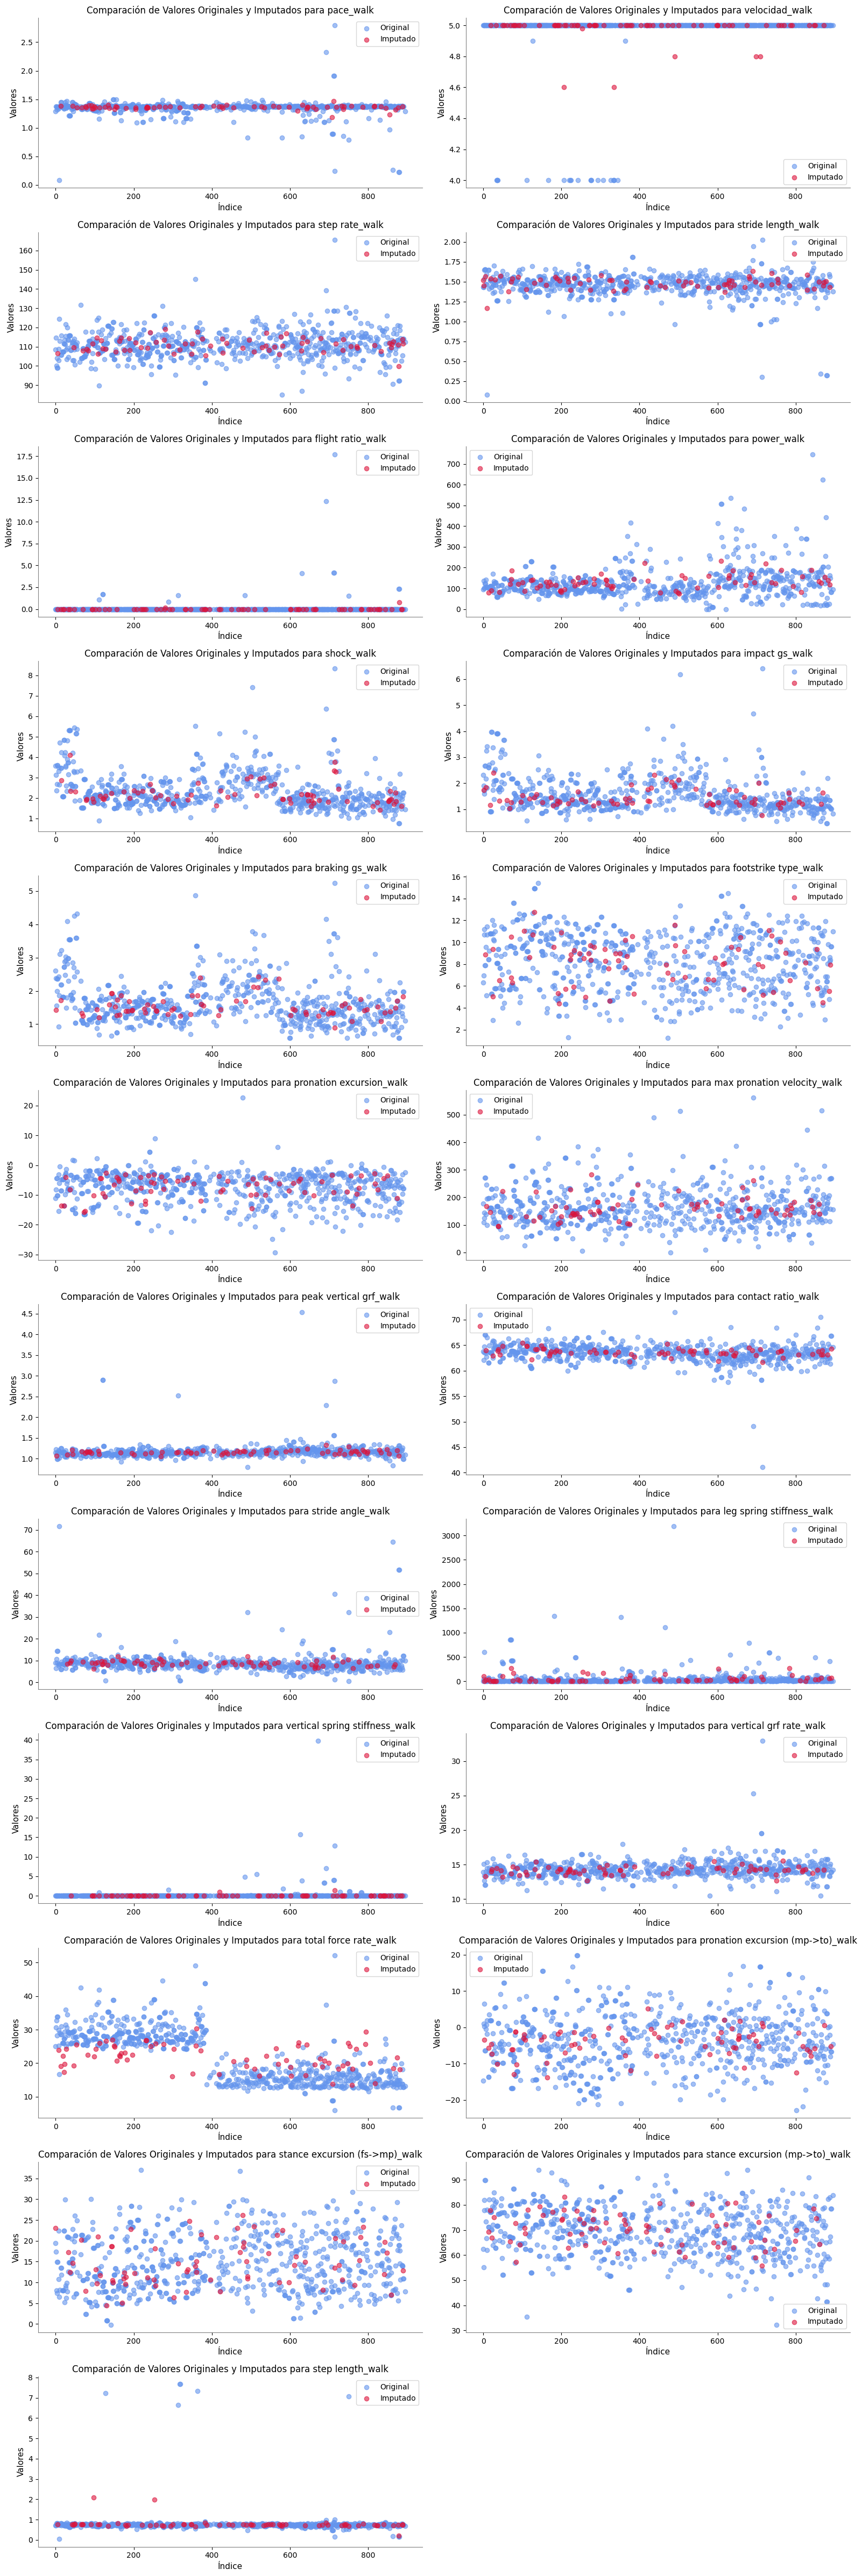

In [45]:
plot_original_vs_imputed(df, df_validation, df_validation_imputed, cols_runscribe_walk, N=len(cols_runscribe_walk))

In [46]:
for column in cols_runscribe_walk:
    # Encuentra los índices de los valores NaN en la columna original
    missing_indices = df[column].isna()
    
    # Reemplaza los valores NaN en el DataFrame original con los valores imputados
    df.loc[missing_indices, column] = df_validation_imputed.loc[missing_indices, column]
    
print(f"Total Valores Faltantes en las columnas de Runscribe Marcha: {df[cols_runscribe_walk].isna().sum().sum()}")

Total Valores Faltantes en las columnas de Runscribe Marcha: 0


## 10. Visualización con Histogramas 

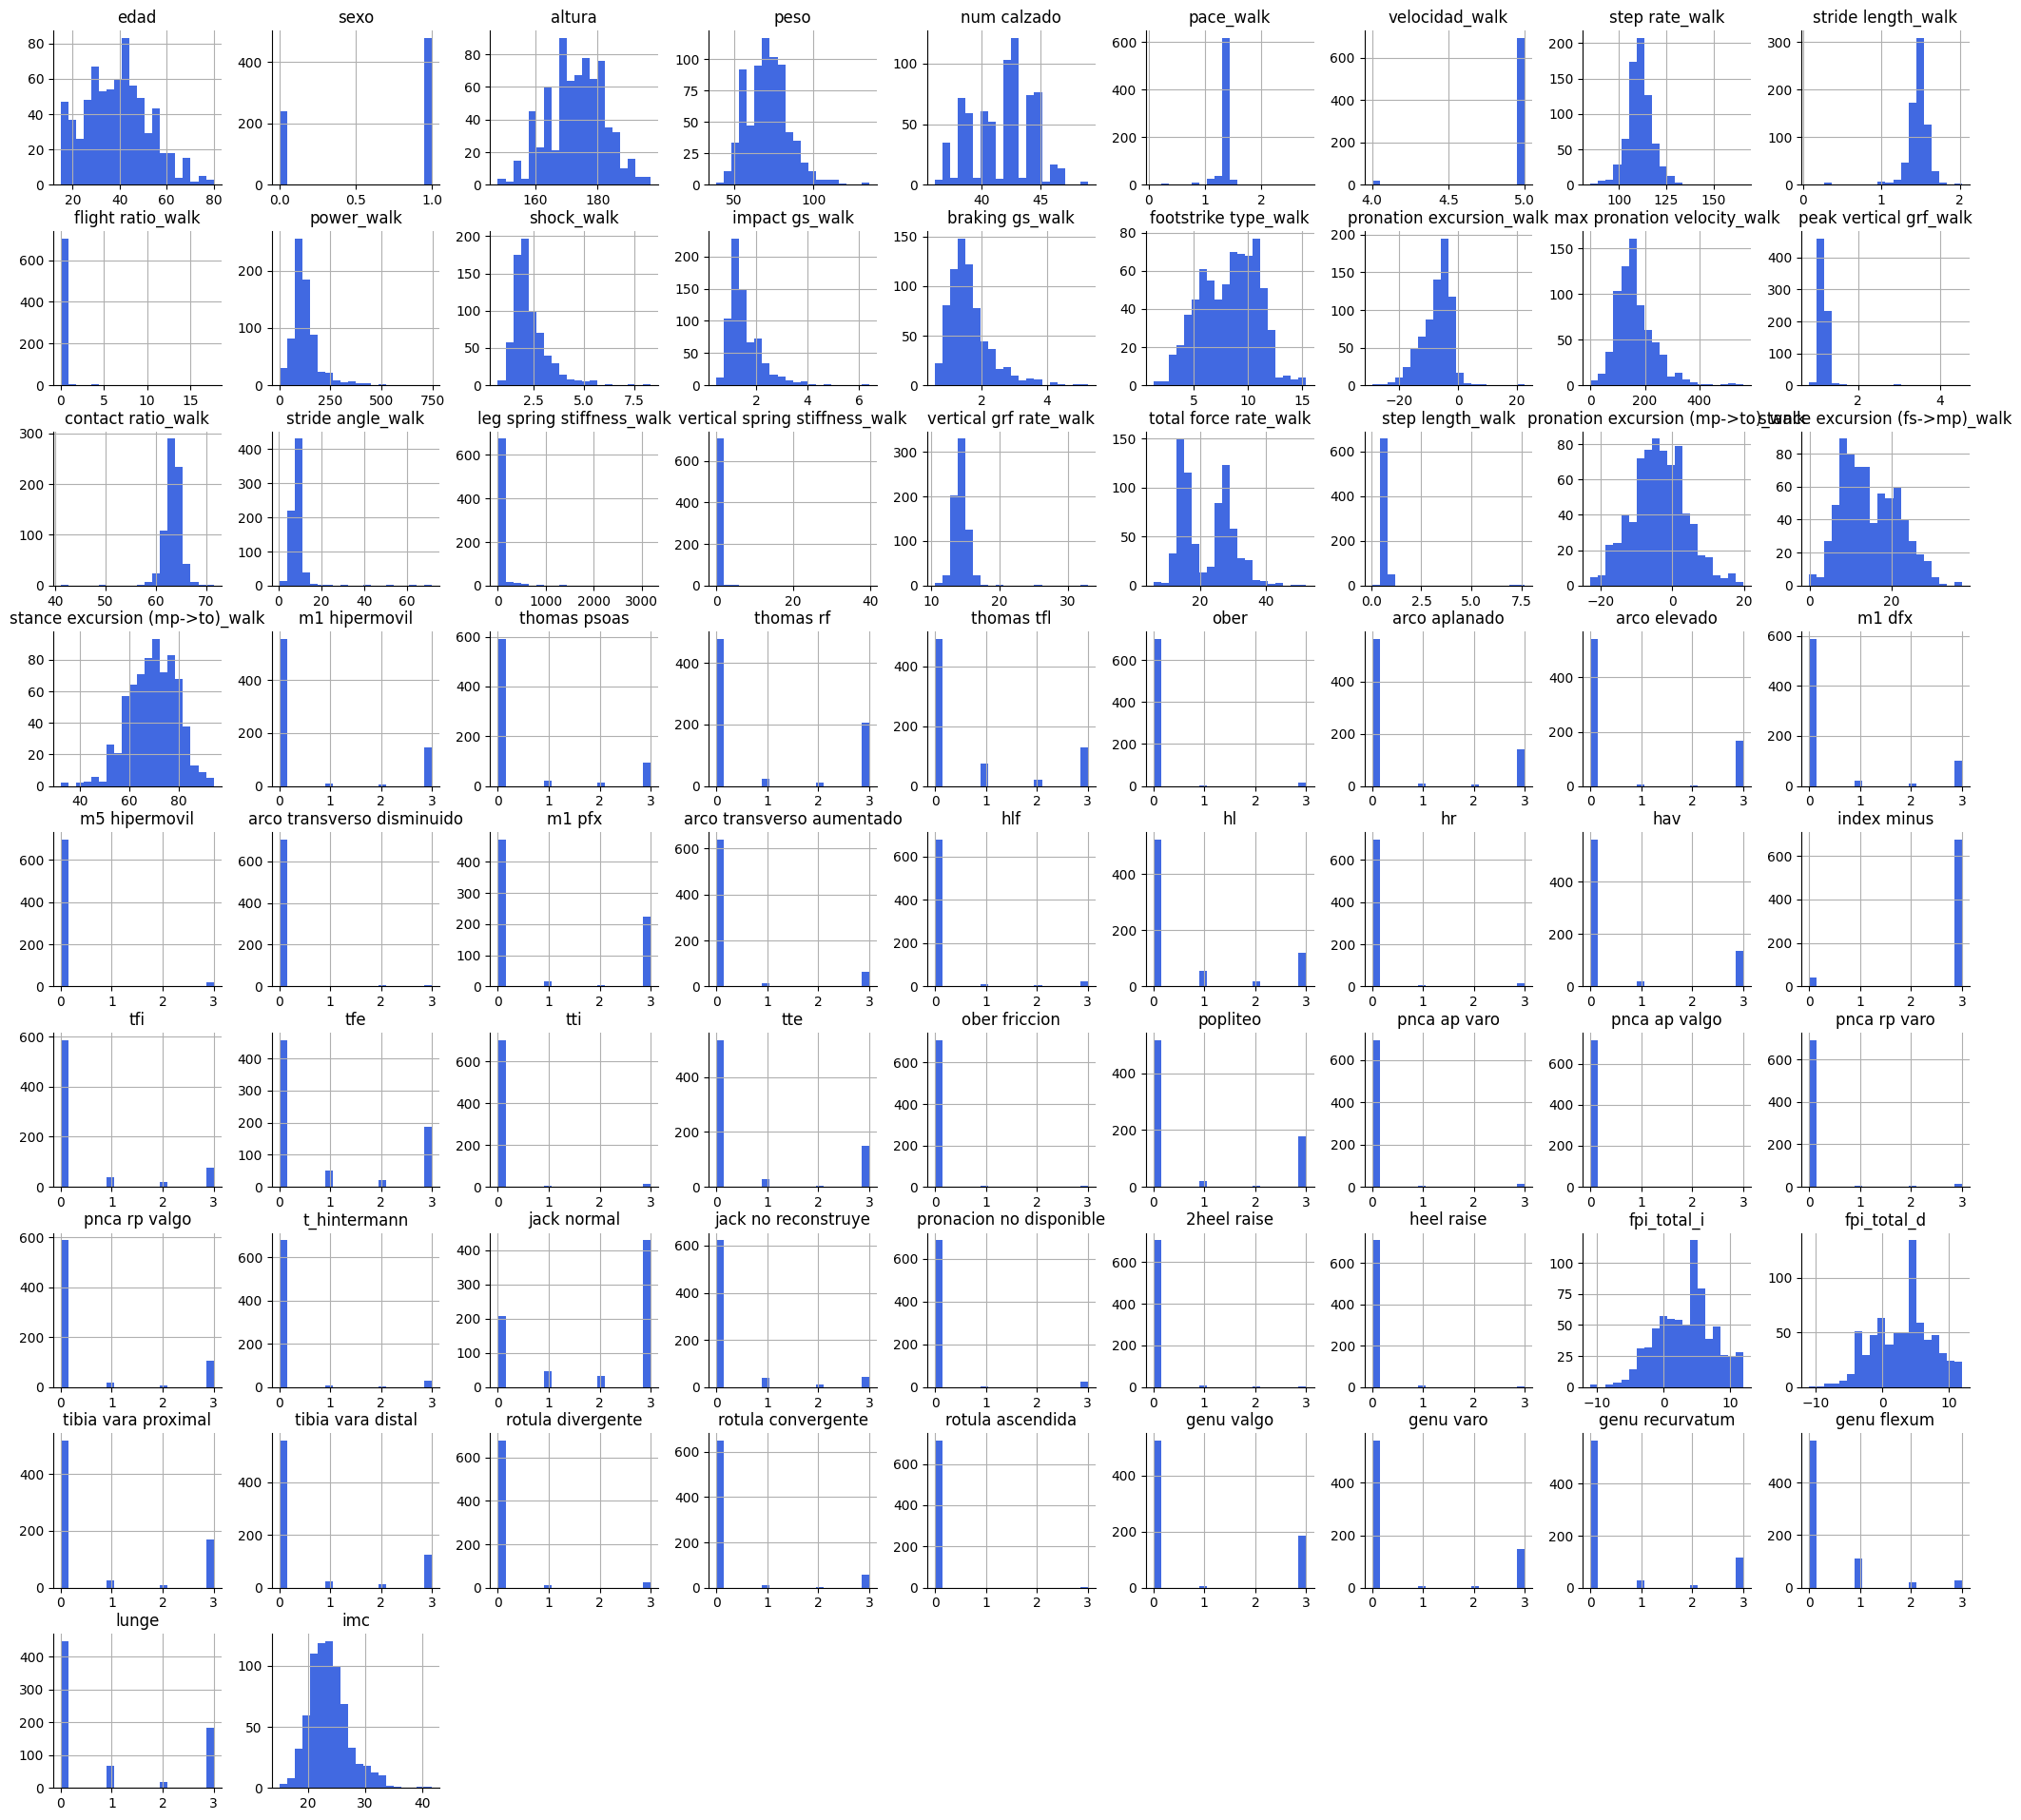

In [47]:
df.hist(bins=20, figsize=(26,24), color='royalblue')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Revisión de Outliers

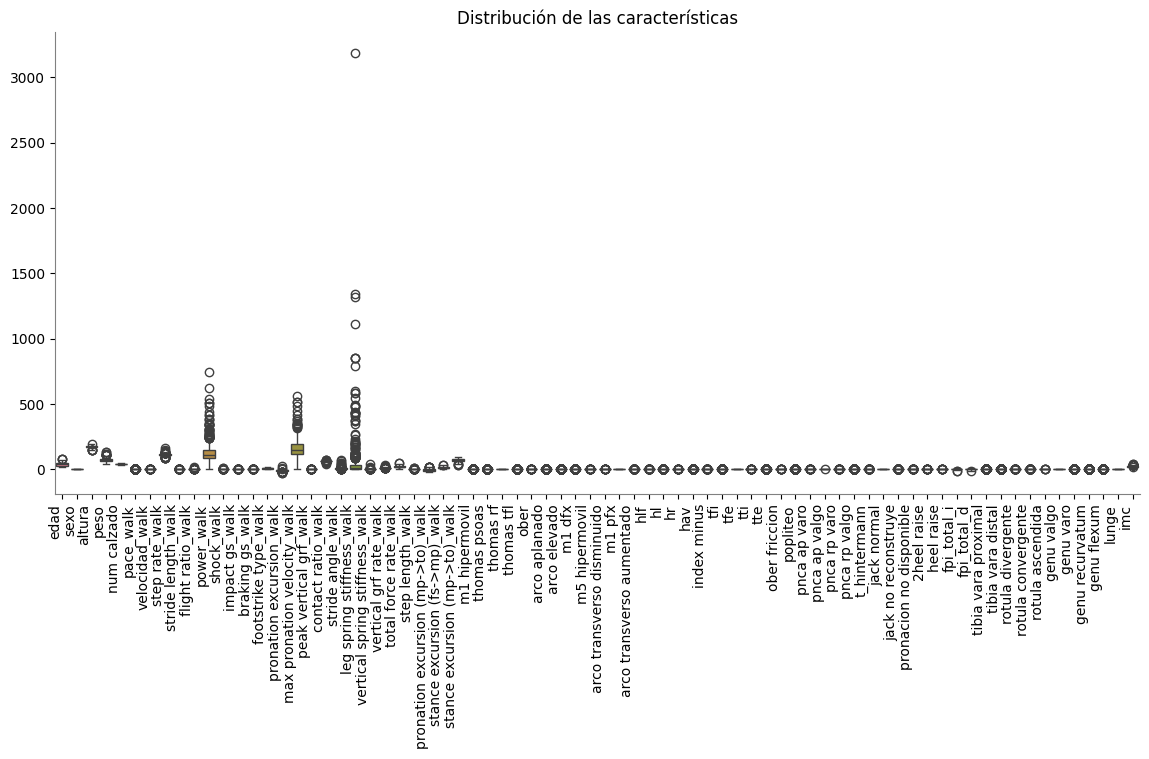

In [48]:
plot_boxplot(df)

In [49]:
df[df['leg spring stiffness_walk'] > 1500]

,edad,sexo,altura,peso,num calzado,articulacion,localizacion,lado,pace_walk,velocidad_walk,step rate_walk,stride length_walk,flight ratio_walk,power_walk,shock_walk,impact gs_walk,braking gs_walk,footstrike type_walk,pronation excursion_walk,max pronation velocity_walk,peak vertical grf_walk,contact ratio_walk,stride angle_walk,leg spring stiffness_walk,vertical spring stiffness_walk,vertical grf rate_walk,total force rate_walk,step length_walk,pronation excursion (mp->to)_walk,stance excursion (fs->mp)_walk,stance excursion (mp->to)_walk,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,pnca ap varo,pnca ap valgo,pnca rp varo,pnca rp valgo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge,imc,zona afectada
488,34,1,170,63.0,42.0,tobillo,anterior,i,1.477679,5.0,113.387838,1.566,0.0,103.862069,2.571107,1.435614,2.112752,8.758621,-6.359924,142.195083,1.153221,63.439631,7.294231,3184.351621,0.0,14.614217,14.276224,0.783,-3.651414,12.441828,73.162193,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,9.0,9.0,3,0,0,0,0,0,3,0,1,0,21.8,pie-tobillo_anterior


In [50]:
columns = ['stride angle_walk', 'leg spring stiffness_walk', 'vertical spring stiffness_walk', 
           'max pronation velocity_walk', 'vertical grf rate_walk', 'flight ratio_walk', 'peak vertical grf_walk',
           'pnca ap varo', 'pnca ap valgo', 'pnca rp varo', 'pnca rp valgo', 'power_walk']

df.drop(columns, axis=1, inplace=True)
df.shape

(717, 66)

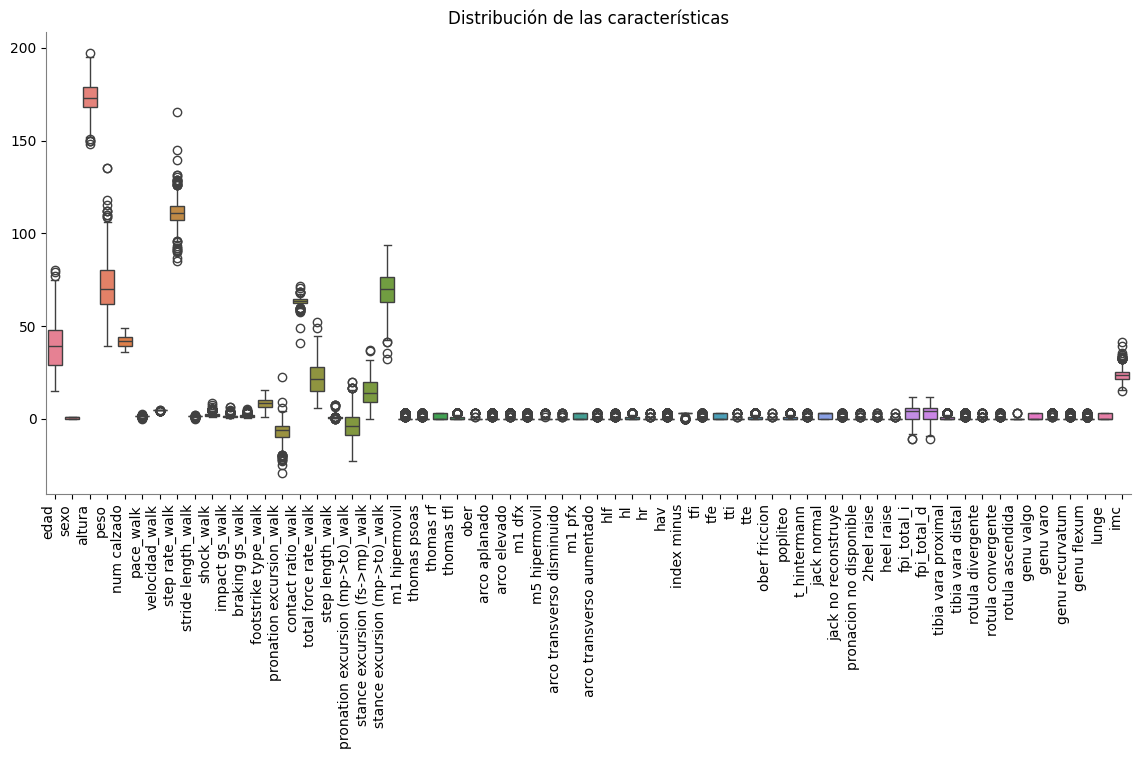

In [51]:
plot_boxplot(df)

## 11. Correlación entre variables

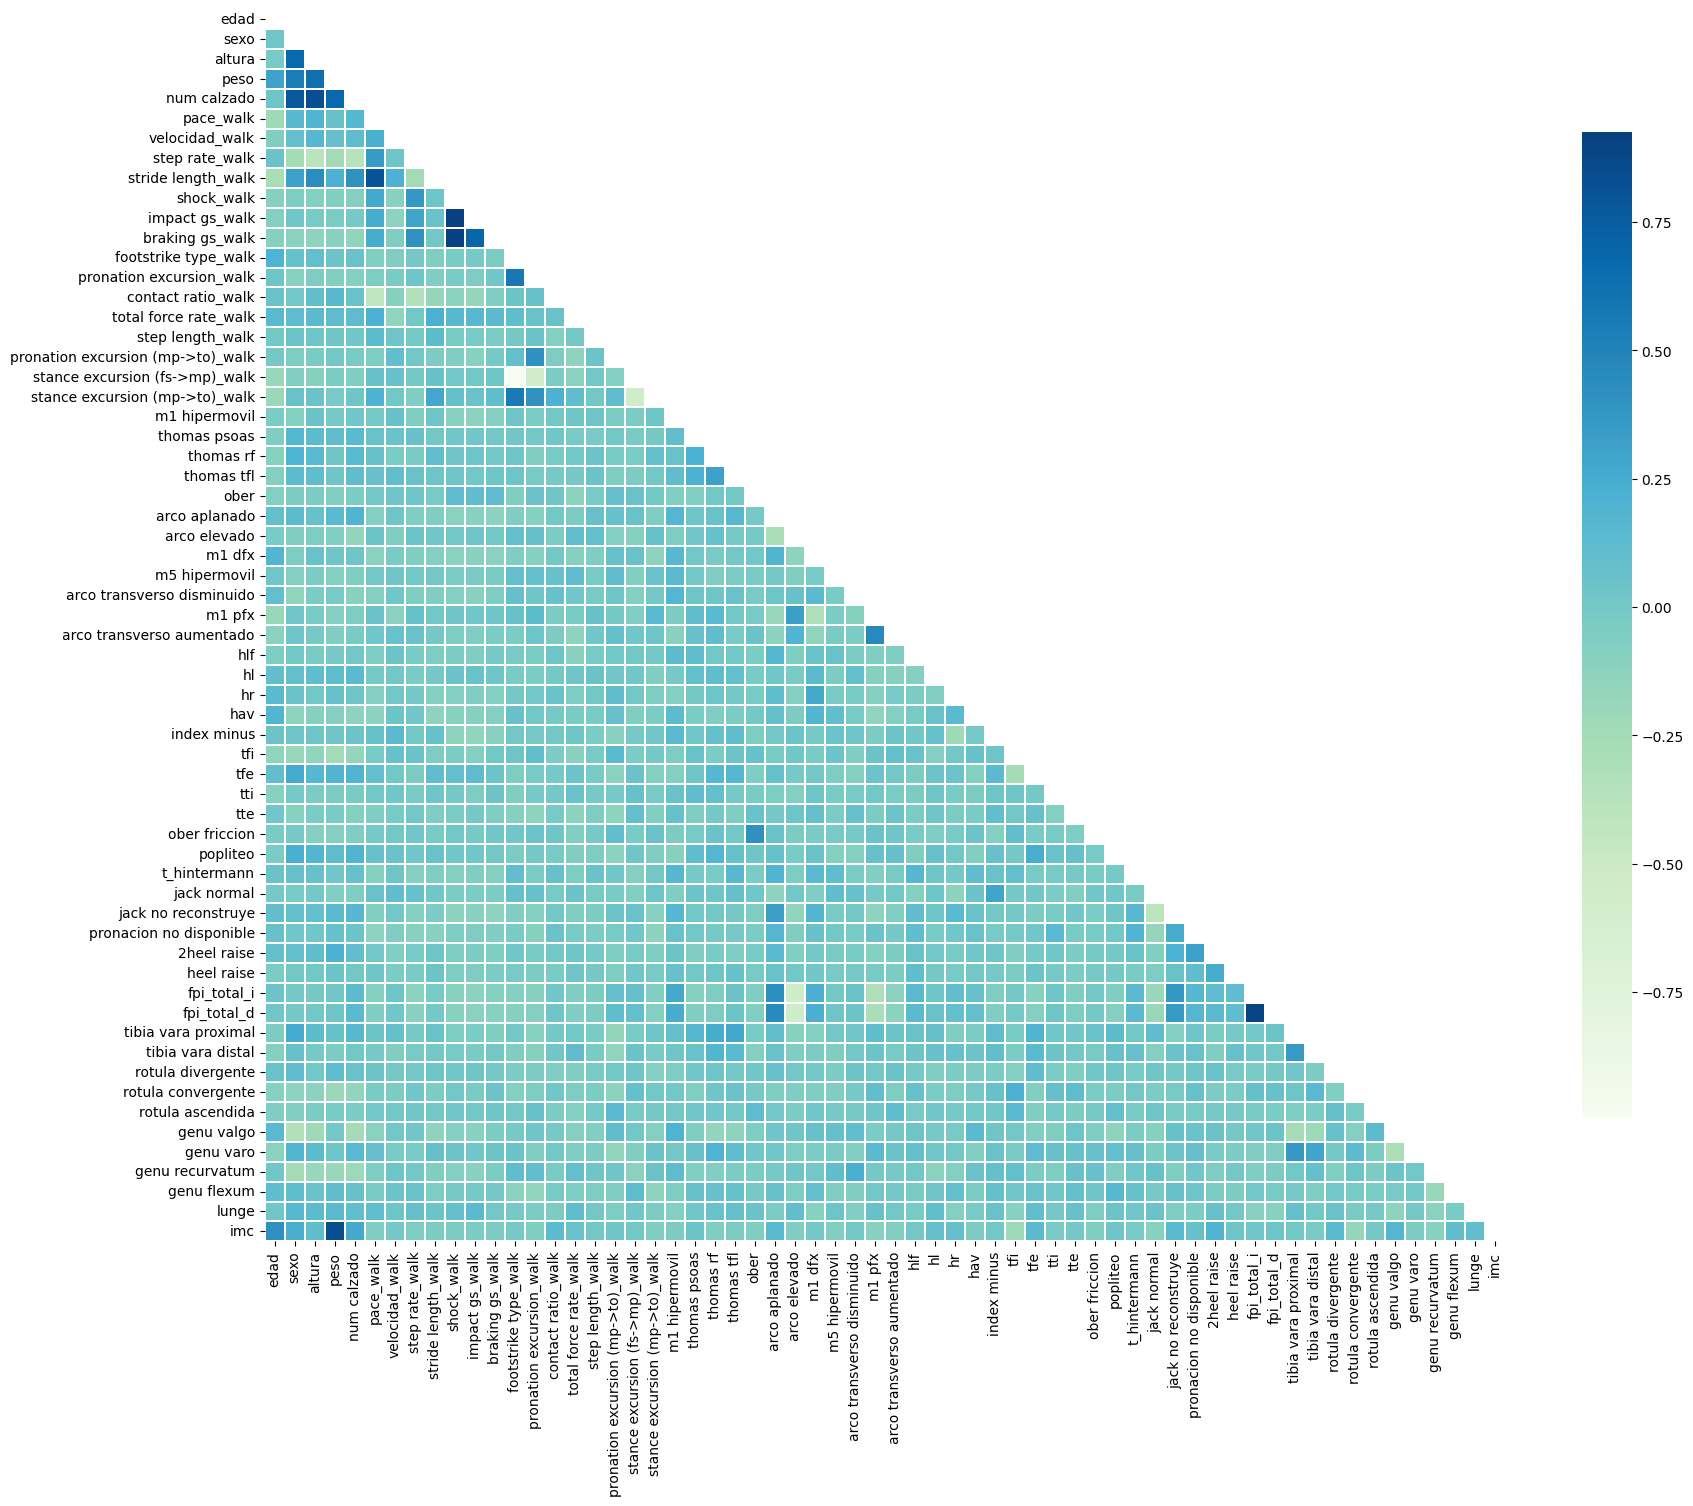

In [52]:
plot_heatmap(df.select_dtypes(include=['number']).corr(), figsize=(20, 16), cmap="GnBu", title='', annot=False)

In [53]:
threshold = 0.5 # Umbral de correlación

# Calcula la matriz de correlación
corr_matrix = df.select_dtypes(include=['number']).corr().abs()

# Encuentra pares con una correlación superior al umbral
strong_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strong_pairs = strong_pairs.stack().reset_index()
strong_pairs.columns = ['variable1', 'variable2', 'correlation']

# Filtra los pares con una correlación fuerte
strong_pairs = strong_pairs[strong_pairs['correlation'] > threshold]

# Muestra los pares ordenados por correlación
strong_pairs = strong_pairs.sort_values('correlation', ascending=False)
strong_pairs

,variable1,variable2,correlation
671,footstrike type_walk,stance excursion (fs->mp)_walk,0.995827
513,shock_walk,impact gs_walk,0.924871
514,shock_walk,braking gs_walk,0.914731
1813,fpi_total_i,fpi_total_d,0.902390
122,altura,num calzado,0.840813
237,peso,imc,0.833687
297,pace_walk,stride length_walk,0.805644
63,sexo,num calzado,0.773278
565,impact gs_walk,braking gs_walk,0.697782
180,peso,num calzado,0.670998


#### Análisis de Correlaciones

1. **Correlaciones muy altas (>= 0.9)**
   - **Footstrike type_walk y Stance excursion (fs->mp)_walk**: Casi perfectamente correlacionados. Esto sugiere que ambos miden fenómenos muy similares o dependientes durante la caminata. Esto podría llevar a redundancia en el modelo.
   - **Shock_walk con Impact gs_walk y Braking gs_walk**: Indica que los choques medidos están muy relacionados con las fuerzas de impacto y frenado. Estos también pueden ser redundantes.
   - **FPI_total_i y FPI_total_d (Foot Posture Index izquierdo y derecho)**: Muy alta correlación sugiere consistencia en la postura del pie entre ambos lados del cuerpo, lo cual es esperado pero también redundante para análisis predictivos.

2. **Correlaciones altas (0.7 - 0.9)**
   - **Altura y número de calzado; Peso e IMC**: Estas correlaciones son intuitivas, ya que reflejan relaciones físicas directas. Pueden no necesitar ser eliminadas pero deben ser consideradas cuidadosamente para evitar multicolinealidad en modelos lineales.
   - **Sexo y número de calzado; Sexo y altura**: Estas son interesantes, ya que sugieren diferencias de género significativas en términos de tamaño físico y elección del calzado.

3. **Correlaciones moderadas (0.5 - 0.7)**
   - **Impact gs_walk y Braking gs_walk; Footstrike type_walk con diferentes excursiones de stance**: Sugerirían relaciones funcionales durante la caminata que son menos directas pero aún potencialmente útiles para comprender la mecánica de la marcha.
   - **Altura y peso; Sexo y peso**: Reflejan relaciones antropométricas que son relevantes pero no tan fuertes.

## 12. Eliminar las columnas `articulacion`, `localizacion` y `lado`

In [54]:
# Guardar el DataFrame en un archivo CSV antes de eliminar las columnas 'articulacion', 'localizacion' y 'lado'
df.to_csv('../data/processed/dataset_complete_segmented.csv',  sep=";", index=False, encoding='utf-8')

In [55]:
columns = ['articulacion', 'localizacion', 'lado']

df.drop(columns, axis=1, inplace=True)
df.shape

(717, 63)

In [56]:
df.describe()

,edad,sexo,altura,peso,num calzado,pace_walk,velocidad_walk,step rate_walk,stride length_walk,shock_walk,impact gs_walk,braking gs_walk,footstrike type_walk,pronation excursion_walk,contact ratio_walk,total force rate_walk,step length_walk,pronation excursion (mp->to)_walk,stance excursion (fs->mp)_walk,stance excursion (mp->to)_walk,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge,imc
count,717.0,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,38.979079,0.666667,173.221757,71.347280,41.690098,1.349609,4.970432,111.059742,1.460512,2.319090,1.546282,1.634164,8.286613,-7.339779,63.468706,22.053296,0.784957,-3.694352,14.646706,69.499282,0.641562,0.453278,0.921897,0.707113,0.065551,0.619247,0.716876,0.478382,0.079498,0.040446,0.974895,0.283124,0.126918,0.631799,0.066946,0.596932,2.827057,0.418410,0.909344,0.054393,0.676430,0.022315,0.775453,0.136681,1.952580,0.269177,0.114365,0.032078,0.016736,3.337517,3.199442,0.757322,0.582985,0.126918,0.253835,0.016736,0.786611,0.634589,0.541144,0.323570,0.912134,23.677434
std,13.56799,0.471734,8.864572,13.272632,2.618595,0.143037,0.168766,6.963230,0.150942,0.869845,0.665171,0.641817,2.607825,4.995025,1.834326,7.647963,0.601167,7.460455,6.702769,9.603917,1.210338,1.030055,1.349336,1.164233,0.432479,1.197678,1.271478,1.060275,0.476352,0.316729,1.384041,0.851818,0.561137,1.138947,0.424110,1.173802,0.695712,0.961898,1.303791,0.389955,1.219563,0.235302,1.289649,0.598655,1.350764,0.770483,0.560105,0.264950,0.182316,4.237753,4.319386,1.269416,1.145987,0.573447,0.815186,0.223604,1.314058,1.215738,1.108648,0.709996,1.291065,3.421989
min,15.0,0.000000,148.000000,39.000000,36.000000,0.083356,4.000000,85.079444,0.080300,0.749673,0.445394,0.586561,1.250000,-29.314351,41.133361,5.951576,0.040100,-22.855125,-0.159270,32.311573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.040000
25%,29.0,0.000000,168.000000,62.000000,39.500000,1.360853,5.000000,106.965260,1.415500,1.746869,1.132492,1.209095,6.142857,-9.949229,62.571985,14.923921,0.709000,-8.719559,9.165190,62.860238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.300000
50%,39.0,1.000000,173.000000,70.000000,42.000000,1.370556,5.000000,110.768829,1.477600,2.085319,1.363766,1.496472,8.641509,-6.237092,63.572288,21.696173,0.739100,-3.900480,13.714370,70.205739,0.000000,0.

## 13. Guardar DataFrames Finales en Archivos CSV

In [57]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('../data/processed/dataset_complete.csv',  sep=";", index=False, encoding='utf-8')

In [58]:
df = df.drop(columns=['zona afectada','num calzado','m1 hipermovil','thomas psoas','thomas rf','thomas tfl',
                      'ober','arco aplanado', 'arco elevado','m1 dfx','m5 hipermovil','arco transverso disminuido',
                      'm1 pfx', 'arco transverso aumentado','hlf','hl','hr','hav','index minus','tfi','tfe','tti',
                      'tte','ober friccion','popliteo','t_hintermann','jack normal','jack no reconstruye',
                      'pronacion no disponible','2heel raise','heel raise','fpi_total_i','fpi_total_d',
                      'tibia vara proximal','tibia vara distal','rotula divergente','rotula convergente',
                      'rotula ascendida','genu valgo','genu varo','genu recurvatum','genu flexum','lunge',
                      'zona afectada'])

In [59]:
# Guardar el DataFrame en un archivo CSV solo con datos de la marcha
df.to_csv('../data/processed/dataset_marcha.csv',  sep=";", index=False, encoding='utf-8')

In [60]:
df.isna().sum().sum()

0